# SAF- Advanced Regression

# 1. Data Understanding and Exploration
Let's first have a look at the dataset and understand the size, attribute names etc.

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [198]:
# reading the dataset
raw_df = pd.read_csv("train.csv")

In [199]:
# summary of the dataset: row: 1460, columns: 81
print(raw_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [200]:
raw_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Finding unwanted columns - Manually

In [201]:
raw_df['Street'].value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

In [202]:
# Finding binary columns having outliers 
# loop = 0
l = {}
# l = set()
for col in raw_df.columns:
    if np.count_nonzero(raw_df[col].unique()) <=2:
        for each in raw_df[col].unique():
            df_temp = raw_df[raw_df[col] == each]
            percent = ((df_temp[col].count()/raw_df[col].count())*100)
            if(ratio < 10.0):
                l[col] = ratio
print(l)



{'Street': 0.0684931506849315, 'Utilities': 0.0684931506849315, 'CentralAir': 0.0684931506849315, 'BsmtHalfBath': 0.0684931506849315, 'HalfBath': 0.0684931506849315}


In [203]:
unique_set = {}
unique_set = set()
culprit_cols = []
l = {}
# l = set()
cat_df = raw_df.select_dtypes(include=['object'])
for col in cat_df.columns:
    unique_set.clear()
    for each in raw_df[col].unique():
        df_temp = raw_df[raw_df[col] == each]
        percent = ((df_temp[col].count()/raw_df[col].count())*100)
        if(percent < 5.0):
            l[col] = percent
            unique_set.add(each)
    if((np.count_nonzero(raw_df[col].unique()) - len(unique_set)) <2):
        culprit_cols.append(col)
print(l)
print(len(l))
print("culprit cols: ")
print(len(culprit_cols))

{'MSZoning': 1.095890410958904, 'Street': 0.410958904109589, 'Alley': 0.0, 'LotShape': 0.684931506849315, 'LandContour': 3.4246575342465753, 'Utilities': 0.0684931506849315, 'LotConfig': 0.273972602739726, 'LandSlope': 0.8904109589041096, 'Neighborhood': 0.136986301369863, 'Condition1': 0.136986301369863, 'Condition2': 0.0684931506849315, 'BldgType': 2.945205479452055, 'HouseStyle': 0.547945205479452, 'RoofStyle': 0.136986301369863, 'RoofMatl': 0.0684931506849315, 'Exterior1st': 0.0684931506849315, 'Exterior2nd': 0.0684931506849315, 'MasVnrType': 0.0, 'ExterQual': 0.9589041095890412, 'ExterCond': 0.2054794520547945, 'Foundation': 0.410958904109589, 'BsmtQual': 2.459592410400562, 'BsmtCond': 0.14054813773717498, 'BsmtExposure': 0.0, 'BsmtFinType1': 0.0, 'BsmtFinType2': 0.9845288326300985, 'Heating': 0.0684931506849315, 'HeatingQC': 0.0684931506849315, 'Electrical': 0.0, 'KitchenQual': 2.671232876712329, 'Functional': 0.0684931506849315, 'FireplaceQu': 2.5974025974025974, 'GarageType': 0

In [205]:
# Droping manually analysed columns which are in no-use for our predication

raw_df = raw_df.drop(['Id','BsmtHalfBath','CentralAir','Utilities','Street','RoofMatl','MiscVal','Alley','LandSlope','Condition2','BsmtCond','Electrical','Functional','GarageQual','GarageCond','PavedDrive','PoolQC','Fence','MiscFeature'], axis=1)

KeyError: "['Id' 'BsmtHalfBath' 'CentralAir' 'Utilities' 'Street' 'RoofMatl'\n 'MiscVal' 'Alley' 'LandSlope' 'Condition2' 'BsmtCond' 'Electrical'\n 'Functional' 'GarageQual' 'GarageCond' 'PavedDrive' 'PoolQC' 'Fence'\n 'MiscFeature'] not found in axis"

# Finding missing rows

In [206]:
raw_df.shape
# raw_df.head()

(1460, 62)

In [208]:
(raw_df.isnull().sum()/raw_df.count())*100

MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      21.565362
LotArea           0.000000
LotShape          0.000000
LandContour       0.000000
LotConfig         0.000000
Neighborhood      0.000000
Condition1        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.550964
MasVnrArea        0.550964
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.600141
BsmtExposure      2.672293
BsmtFinType1      2.600141
BsmtFinSF1        0.000000
BsmtFinType2      2.672293
BsmtFinSF2        0.000000
BsmtUnfSF         0.000000
TotalBsmtSF       0.000000
Heating           0.000000
HeatingQC         0.000000
1stFlrSF          0.000000
2ndFlrSF          0.000000
LowQualFinSF      0.000000
GrLivArea         0.000000
B

In [209]:
#coll FireplaceQu
raw_df = raw_df.drop(['FireplaceQu'], axis=1)
raw_df = raw_df.dropna(subset=['MasVnrType','MasVnrArea','BsmtQual','BsmtExposure','BsmtFinType1','BsmtFinType2','GarageType', 'GarageYrBlt', 'GarageFinish'])
(raw_df.isnull().sum()/raw_df.count())*100


MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      22.283105
LotArea           0.000000
LotShape          0.000000
LandContour       0.000000
LotConfig         0.000000
Neighborhood      0.000000
Condition1        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.000000
MasVnrArea        0.000000
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          0.000000
BsmtExposure      0.000000
BsmtFinType1      0.000000
BsmtFinSF1        0.000000
BsmtFinType2      0.000000
BsmtFinSF2        0.000000
BsmtUnfSF         0.000000
TotalBsmtSF       0.000000
Heating           0.000000
HeatingQC         0.000000
1stFlrSF          0.000000
2ndFlrSF          0.000000
LowQualFinSF      0.000000
GrLivArea         0.000000
B

In [214]:
raw_df['LotFrontage'].describe()

count    1095.000000
mean       70.761644
std        24.497748
min        21.000000
25%        60.000000
50%        70.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [217]:
# Impute missing values with the column median value
raw_df['LotFrontage'] = raw_df['LotFrontage'].fillna(raw_df['LotFrontage'].median())

In [218]:
(raw_df.isnull().sum()/raw_df.count())*100

MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
LotShape         0.0
LandContour      0.0
LotConfig        0.0
Neighborhood     0.0
Condition1       0.0
BldgType         0.0
HouseStyle       0.0
OverallQual      0.0
OverallCond      0.0
YearBuilt        0.0
YearRemodAdd     0.0
RoofStyle        0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
BsmtQual         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinSF1       0.0
BsmtFinType2     0.0
BsmtFinSF2       0.0
BsmtUnfSF        0.0
TotalBsmtSF      0.0
Heating          0.0
HeatingQC        0.0
1stFlrSF         0.0
2ndFlrSF         0.0
LowQualFinSF     0.0
GrLivArea        0.0
BsmtFullBath     0.0
FullBath         0.0
HalfBath         0.0
BedroomAbvGr     0.0
KitchenAbvGr     0.0
KitchenQual      0.0
TotRmsAbvGrd     0.0
Fireplaces       0.0
GarageType       0.0
GarageYrBlt      0.0
GarageFinish 

# 2. Feature Derive

In [226]:
from datetime import date
# Defining the map function
def find_age(x):
    today = date.today() 
    age = today.year - x
    return age 
# Applying the function to the housing list
# YearBuilt
# YearRemodAdd  
raw_df['YearBuilt'] = raw_df['YearBuilt'].astype(int)
raw_df[['BuitAge']] = raw_df[['YearBuilt']].apply(find_age)
raw_df['YearRemodAdd'] = raw_df['YearRemodAdd'].astype(int)
raw_df[['RemodAge']] = raw_df[['YearRemodAdd']].apply(find_age)
raw_df.head()


,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MoSold,YrSold,SaleType,SaleCondition,SalePrice,RemodAge,BuitAge
0,60,RL,65.0,8450,Reg,Lvl,Inside,CollgCr,Norm,1Fam,2Story,7,5,2003,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,No,GLQ,706,Unf,0,150,856,GasA,Ex,856,854,0,1710,1,2,1,3,1,Gd,8,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,2,2008,WD,Normal,208500,17,17
1,20,RL,80.0,9600,Reg,Lvl,FR2,Veenker,Feedr,1Fam,1Story,6,8,1976,1976,Gable,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,1262,0,0,1262,0,2,0,3,1,TA,6,1,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,5,2007,WD,Normal,181500,44,44
2,60,RL,68.0,11250,IR1,Lvl,Inside,CollgCr,Norm,1Fam,2Story,7,5,2001,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,920,866,0,1786,1,2,1,3,1,Gd,6,1,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,9,2008,WD,Normal,223500,18,19
3,70,RL,60.0,9550,IR1,Lvl,Corner,Crawfor,Norm,1Fam,2Story,7,5,1915,1970,Gable,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,No,ALQ,216,Unf,0,540,756,GasA,Gd,961,756,0,1717,1,1,0,3,1,Gd,7,1,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,2,2006,WD,Abnorml,140000,50,105
4,60,RL,84.0,14260,IR1,Lvl,FR2,NoRidge,Norm,1Fam,2Story,8,5,2000,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,1145,1053,0,2198,1,2,1,4,1,Gd,9,1,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,12,2008,WD,Normal,250000,20,20


In [227]:
raw_df = raw_df.drop(['YearBuilt'], axis=1)
raw_df = raw_df.drop(['YearRemodAdd'], axis=1)
raw_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MoSold,YrSold,SaleType,SaleCondition,SalePrice,RemodAge,BuitAge
0,60,RL,65.0,8450,Reg,Lvl,Inside,CollgCr,Norm,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,No,GLQ,706,Unf,0,150,856,GasA,Ex,856,854,0,1710,1,2,1,3,1,Gd,8,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,2,2008,WD,Normal,208500,17,17
1,20,RL,80.0,9600,Reg,Lvl,FR2,Veenker,Feedr,1Fam,1Story,6,8,Gable,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,1262,0,0,1262,0,2,0,3,1,TA,6,1,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,5,2007,WD,Normal,181500,44,44
2,60,RL,68.0,11250,IR1,Lvl,Inside,CollgCr,Norm,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,920,866,0,1786,1,2,1,3,1,Gd,6,1,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,9,2008,WD,Normal,223500,18,19
3,70,RL,60.0,9550,IR1,Lvl,Corner,Crawfor,Norm,1Fam,2Story,7,5,Gable,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,No,ALQ,216,Unf,0,540,756,GasA,Gd,961,756,0,1717,1,1,0,3,1,Gd,7,1,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,2,2006,WD,Abnorml,140000,50,105
4,60,RL,84.0,14260,IR1,Lvl,FR2,NoRidge,Norm,1Fam,2Story,8,5,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,1145,1053,0,2198,1,2,1,4,1,Gd,9,1,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,12,2008,WD,Normal,250000,20,20


In [228]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1339 entries, 0 to 1459
Data columns (total 61 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1339 non-null   int64  
 1   MSZoning       1339 non-null   object 
 2   LotFrontage    1339 non-null   float64
 3   LotArea        1339 non-null   int64  
 4   LotShape       1339 non-null   object 
 5   LandContour    1339 non-null   object 
 6   LotConfig      1339 non-null   object 
 7   Neighborhood   1339 non-null   object 
 8   Condition1     1339 non-null   object 
 9   BldgType       1339 non-null   object 
 10  HouseStyle     1339 non-null   object 
 11  OverallQual    1339 non-null   int64  
 12  OverallCond    1339 non-null   int64  
 13  RoofStyle      1339 non-null   object 
 14  Exterior1st    1339 non-null   object 
 15  Exterior2nd    1339 non-null   object 
 16  MasVnrType     1339 non-null   object 
 17  MasVnrArea     1339 non-null   float64
 18  ExterQua

## 3. Data Preparation 


#### Data Preparation

Let's now prepare the data and build the model.

In [232]:
# split into X and y
X = raw_df.drop(['SalePrice'],axis=1)

y = raw_df['SalePrice']

In [233]:
# creating dummy variables for categorical variables

# subset all categorical variables
house_categorical = X.select_dtypes(include=['object'])
house_categorical.head()

,MSZoning,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,KitchenQual,GarageType,GarageFinish,SaleType,SaleCondition
0,RL,Reg,Lvl,Inside,CollgCr,Norm,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,No,GLQ,Unf,GasA,Ex,Gd,Attchd,RFn,WD,Normal
1,RL,Reg,Lvl,FR2,Veenker,Feedr,1Fam,1Story,Gable,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,Gd,ALQ,Unf,GasA,Ex,TA,Attchd,RFn,WD,Normal
2,RL,IR1,Lvl,Inside,CollgCr,Norm,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,Mn,GLQ,Unf,GasA,Ex,Gd,Attchd,RFn,WD,Normal
3,RL,IR1,Lvl,Corner,Crawfor,Norm,1Fam,2Story,Gable,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,No,ALQ,Unf,GasA,Gd,Gd,Detchd,Unf,WD,Abnorml
4,RL,IR1,Lvl,FR2,NoRidge,Norm,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,Av,GLQ,Unf,GasA,Ex,Gd,Attchd,RFn,WD,Normal


In [234]:
# convert into dummies
house_dummies = pd.get_dummies(house_categorical, drop_first=True)
house_dummies.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasW,Heating_Grav,Heating_OthW,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,

In [235]:
# drop categorical variables 
X = X.drop(list(house_categorical.columns), axis=1)

In [297]:
# concat dummy variables with X
X = pd.concat([X, house_dummies], axis=1)
print(len(X.columns))

1226


In [290]:
# scaling the features
from sklearn.preprocessing import scale

# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=183)

In [239]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

# 3. Model Building and Evaluation

## Ridge Regression

In [274]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.7s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [275]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.007276,0.001577,0.001751,0.000442,0.0001,{'alpha': 0.0001},-22325.183715,-19538.113422,-19972.463892,-16791.842606,-20869.131930,-19899.347113,1823.051613,28,-13770.895533,-14615.402122,-13945.565099,-15560.320275,-14078.692651,-14394.175136,647.779822
1,0.006279,0.000749,0.001378,0.000415,0.001,{'alpha': 0.001},-22324.608311,-19537.721528,-19972.401467,-16791.514797,-20868.963542,-19899.041929,1823.007358,27,-13770.861707,-14615.395458,-13945.527607,-15560.287499,-14078.674877,-14394.149429,647.781000
2,0.006642,0.001598,0.001621,0.000533,0.01,{'alpha': 0.01},-22318.897438,-19533.835291,-19971.774095,-16789.836714,-20867.287255,-19896.326159,1822.031050,26,-13770.525800,-14615.333199,-13945.154675,-15559.962715,-14078.499107,-14393.895099,647.793238
3,0.008221,0.001646,0.001931,0.000055,0.05,{'alpha': 0.05},-22294.416795,-19518.114732,-19968.920073,-16786.132975,-20859.996545,-19885.516224,1816.619412,25,-13769.170194,-14615.038070,-13943.539359,-15558.581182,-14077.812204,-14392.828202,647.827460
4,0.008507,0.001445,0.001754,0.000382,0.1,{'alpha': 0.1},-22265.691505,-19500.215130,-19965.214160,-16781.727298,-20851.217262,-19872.813071,1810.266301,24,-13767.675306,-14614.685729,-13941.610024,-15556.981598,-14077.134409,-14391.617413,647.849230


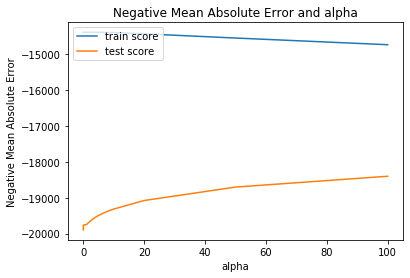

In [276]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [289]:
alpha = 510
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-1.99734415e+03,  3.07807882e+03,  2.81755316e+03,  8.27262968e+03,
        3.68643725e+03,  4.36839906e+03,  5.01069945e+03,  1.06660349e+02,
        2.56574766e+02,  5.98581110e+03,  5.65937699e+03,  4.82560763e+03,
        8.87422073e+02,  8.35666795e+03,  1.92530132e+03,  2.94610067e+03,
        2.50807476e+03,  2.33020449e+02, -2.36662882e+03,  5.10245421e+03,
        3.34624095e+03,  1.07521712e+03,  3.25038055e+03,  3.89300825e+03,
        2.57401487e+03,  1.04231824e+03,  2.16037527e+02,  7.17285313e+02,
        1.63194076e+03,  3.16247827e+03, -9.48393223e+02, -1.12936911e+02,
       -2.36917143e+03, -2.45821782e+03,  6.65005596e+02, -7.81639682e+00,
        9.74917694e+02, -7.49210590e+02,  1.38474176e+03,  4.32669220e+02,
       -1.53095731e+03,  7.99398157e+02, -6.16042983e+01,  9.56795986e+02,
        1.70580887e+03, -9.72864441e+02, -5.80799617e+02, -6.68532686e+02,
        2.71569078e-01, -9.40120068e+01,  5.07854924e+02,  2.32103087e+02,
       -1.37827416e+03,  

In [302]:
def last(n):
    return n[-1]  
def sort_tuple(tuples):
    return sorted(tuples, key=last)

model_parameters = list(ridge.coef_) ## lm is model name 
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns 
cols = cols.insert(0, "intercept")

print(sort_tuple(tuple(zip(cols, model_parameters))))

[('KitchenQual_TA', -3412.982), ('BsmtQual_Gd', -3399.439), ('ExterQual_TA', -3160.669), ('KitchenQual_Gd', -3151.119), ('BsmtExposure_No', -2714.555), ('BsmtQual_TA', -2599.342), ('BuitAge', -2458.218), ('RemodAge', -2369.171), ('KitchenAbvGr', -2366.629), ('Neighborhood_Edwards', -2320.186), ('Neighborhood_NAmes', -2274.241), ('MSSubClass', -1997.344), ('GarageFinish_RFn', -1809.568), ('Neighborhood_Gilbert', -1793.693), ('Condition1_PosN', -1788.356), ('HeatingQC_TA', -1721.732), ('BldgType_TwnhsE', -1615.371), ('LotShape_Reg', -1530.957), ('Condition1_RRAe', -1417.537), ('BldgType_Twnhs', -1413.781), ('Neighborhood_CollgCr', -1378.274), ('Neighborhood_NWAmes', -1251.834), ('SaleCondition_Family', -1203.406), ('Neighborhood_MeadowV', -1168.023), ('BsmtFinType1_Unf', -1148.046), ('HeatingQC_Gd', -1131.396), ('GarageFinish_Unf', -1112.349), ('Neighborhood_Mitchel', -1109.688), ('SaleCondition_Alloca', -1078.566), ('Neighborhood_SWISU', -1057.207), ('HeatingQC_Fa', -987.775), ('Neighbo

## top five predictor variables:
('KitchenQual_TA', -3412.982), 
('BsmtQual_Gd', -3399.439),  
('TotalBsmtSF', 5985.811), 
('OverallQual', 8272.63), 
('GrLivArea', 8356.668)

## Lasso

In [266]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

# cross validation
folds = 5
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)           
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:   17.1s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [268]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.133828,0.011256,0.002438,0.000531,0.0001,{'alpha': 0.0001},-22397.921497,-19511.125547,-20069.752838,-16782.891017,-20861.803296,-19924.698839,1847.053600,28,-13768.760781,-14616.246904,-13944.345674,-15557.674607,-14077.153047,-14392.836203,647.615718
1,0.129217,0.010505,0.001894,0.000539,0.001,{'alpha': 0.001},-22397.579477,-19511.094440,-20069.754532,-16782.873494,-20861.784444,-19924.617277,1846.967477,27,-13768.757248,-14616.244567,-13944.339754,-15557.669599,-14077.150336,-14392.832301,647.615520
2,0.117708,0.007511,0.002176,0.000722,0.01,{'alpha': 0.01},-22394.158590,-19510.783622,-20069.771456,-16782.698274,-20861.595964,-19923.801581,1846.106339,26,-13768.722352,-14616.222104,-13944.282055,-15557.622120,-14077.127013,-14392.795129,647.613882
3,0.124969,0.004764,0.002198,0.000751,0.05,{'alpha': 0.05},-22378.934098,-19509.402422,-20069.846346,-16781.919633,-20860.758781,-19920.172256,1842.279920,25,-13768.570844,-14616.125756,-13944.064363,-15557.418920,-14077.025282,-14392.641033,647.603410
4,0.123087,0.015816,0.001637,0.000449,0.1,{'alpha': 0.1},-22369.209962,-19507.676405,-20069.939151,-16780.946674,-20859.721642,-19917.498767,1839.990392,24,-13768.382385,-14616.005015,-13943.810962,-15557.165369,-14076.901622,-14392.453071,647.587351


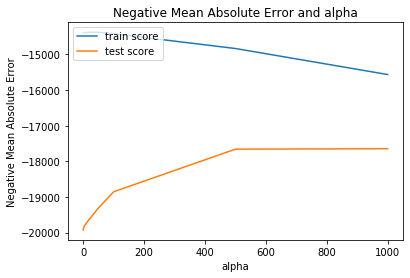

In [269]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [272]:
alpha =510

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train)

Lasso(alpha=510, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [273]:
lasso.coef_

array([ -5562.68598344,   2003.79001687,   4316.0777148 ,  11927.83949536,
         6835.32824067,   2935.72211586,   6912.87303833,      0.        ,
           -0.        ,   5982.7120742 ,      0.        ,   1147.09386317,
            0.        ,  25194.31337148,   1019.57203104,      0.        ,
          296.84355546,  -1078.61363527,  -3223.90597958,   4263.42361117,
         1418.43144362,      0.        ,   2890.75512476,   2738.23663074,
         2028.58967743,      0.        ,      0.        ,    251.63886957,
         1575.68543852,   3499.22188606,   -878.53469429,      0.        ,
         -577.05706299, -10418.83760756,    461.41973827,      0.        ,
            0.        ,     -0.        ,   1477.30596155,    635.67618588,
         -424.07920688,    673.84097098,      0.        ,   1814.60753192,
         1775.19866345,   -698.18759905,  -1000.16588713,   -134.32850027,
            0.        ,     -0.        ,    878.73271978,      0.        ,
            0.        ,  

In [304]:
model_parameters = list(lasso.coef_) 
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "intercept")

print(sort_tuple(tuple(zip(cols, model_parameters))))

[('BuitAge', -10418.838), ('KitchenQual_Gd', -10374.817), ('KitchenQual_TA', -10254.53), ('BsmtQual_Gd', -6844.753), ('MSSubClass', -5562.686), ('BsmtQual_TA', -4768.846), ('KitchenAbvGr', -3223.906), ('Condition1_PosN', -2357.141), ('Neighborhood_Edwards', -2192.768), ('BsmtExposure_No', -2071.898), ('Neighborhood_NAmes', -1717.227), ('KitchenQual_Fa', -1688.985), ('HeatingQC_TA', -1301.312), ('Condition1_RRAe', -1281.189), ('SaleCondition_Alloca', -1212.353), ('BedroomAbvGr', -1078.614), ('BsmtQual_Fa', -1008.955), ('LotConfig_FR3', -1000.166), ('HeatingQC_Gd', -988.479), ('GarageFinish_RFn', -943.165), ('MoSold', -878.535), ('Exterior1st_ImStucc', -842.463), ('ExterQual_TA', -838.894), ('Exterior1st_Plywood', -828.85), ('SaleCondition_Family', -739.231), ('LotConfig_FR2', -698.188), ('Condition1_PosA', -635.561), ('RemodAge', -577.057), ('Neighborhood_Mitchel', -503.04), ('BldgType_Twnhs', -475.183), ('HeatingQC_Fa', -470.728), ('BsmtFinType1_LwQ', -467.062), ('GarageType_CarPort', 

In [ ]:
Top five predictor variables from Lasso model:
('BuitAge', -10418.838), 
('KitchenQual_Gd', -10374.817), 
('Neighborhood_NridgHt', 7891.611), 
('OverallQual', 11927.839), 
('GrLivArea', 25194.313)

## Double the alpha for ridge:

In [307]:
alpha = 1020
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X_train.columns
cols = cols.insert(0, "intercept")

print(sort_tuple(tuple(zip(cols, model_parameters))))

[('ExterQual_TA', -2962.816), ('KitchenQual_TA', -2861.584), ('BsmtExposure_No', -2524.14), ('RemodAge', -2323.947), ('BsmtQual_Gd', -2288.248), ('BsmtQual_TA', -2131.106), ('BuitAge', -1891.853), ('Neighborhood_Edwards', -1812.925), ('KitchenAbvGr', -1809.838), ('KitchenQual_Gd', -1758.384), ('Neighborhood_NAmes', -1699.903), ('LotShape_Reg', -1625.655), ('HeatingQC_TA', -1590.296), ('Neighborhood_Gilbert', -1537.399), ('MSSubClass', -1524.64), ('GarageFinish_RFn', -1362.749), ('GarageFinish_Unf', -1339.388), ('BldgType_TwnhsE', -1312.863), ('RoofStyle_Gable', -1301.233), ('Foundation_CBlock', -1272.147), ('BsmtFinType1_Unf', -1250.465), ('Neighborhood_CollgCr', -1210.416), ('BldgType_Twnhs', -1175.687), ('Neighborhood_MeadowV', -1162.921), ('Condition1_PosN', -1152.858), ('Condition1_RRAe', -1067.541), ('SaleCondition_Family', -1017.593), ('MSZoning_RM', -958.866), ('BldgType_Duplex', -955.636), ('Neighborhood_NWAmes', -953.746), ('HeatingQC_Gd', -918.022), ('SaleType_WD', -881.573),

In [ ]:
('TotalBsmtSF', 5243.749), ('OverallQual', 6952.066), ('GrLivArea', 7142.03), ('ExterQual_TA', -2962.816), ('KitchenQual_TA', -2861.584)

In [308]:
# Lasso Regression with double alpha value:
alpha = 1020

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

lasso.coef_

model_parameters = list(lasso.coef_)
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X_train.columns
cols = cols.insert(0, "intercept")

print(sort_tuple(tuple(zip(cols, model_parameters))))

[('BuitAge', -8949.42), ('KitchenQual_Gd', -6303.696), ('KitchenQual_TA', -6176.042), ('MSSubClass', -4210.178), ('BsmtQual_Gd', -4199.056), ('KitchenAbvGr', -3050.847), ('Condition1_PosN', -1927.725), ('BsmtExposure_No', -1880.009), ('BsmtQual_TA', -1840.271), ('RemodAge', -1551.059), ('Neighborhood_Edwards', -1492.419), ('ExterQual_TA', -1387.714), ('Neighborhood_NAmes', -1056.475), ('SaleCondition_Alloca', -824.439), ('HeatingQC_TA', -807.794), ('SaleCondition_Family', -782.573), ('Condition1_RRAe', -722.569), ('MasVnrType_BrkFace', -691.956), ('GarageFinish_RFn', -618.415), ('LotShape_Reg', -470.664), ('MoSold', -455.909), ('BldgType_Twnhs', -383.371), ('Exterior1st_Plywood', -367.176), ('BldgType_Duplex', -323.894), ('Neighborhood_NWAmes', -284.449), ('Exterior2nd_Plywood', -283.754), ('HeatingQC_Gd', -276.943), ('KitchenQual_Fa', -216.573), ('LotConfig_FR3', -185.571), ('Heating_OthW', -179.529), ('BsmtFinType1_LwQ', -172.695), ('Exterior1st_ImStucc', -157.567), ('GarageType_Basm

In [ ]:
Top five:
    ('Neighborhood_NridgHt', 7852.762), 
    ('OverallQual', 14155.049), 
    ('GrLivArea', 26949.475), 
    ('BuitAge', -8949.42), 
    ('KitchenQual_Gd', -6303.696)

In [309]:
# Ridge Regression
#('KitchenQual_TA', -3412.982), ('BsmtQual_Gd', -3399.439),
('TotalBsmtSF', 5985.811), ('OverallQual', 8272.63), ('GrLivArea', 8356.668)

X_train_ridge_new = X_train.drop(columns= ['KitchenQual_TA', 'BsmtQual_Gd', 'TotalBsmtSF', 'OverallQual', 'GrLivArea'])

alpha = 510
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_ridge_new, y_train)
ridge.coef_

model_parameters = list(ridge.coef_) ## lm is model name 
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X_train_ridge_new.columns #variable name
cols = cols.insert(0, "intercept")

print(sort_tuple(tuple(zip(cols, model_parameters))))

[('ExterQual_TA', -4629.814), ('BsmtExposure_No', -3091.053), ('RemodAge', -2990.687), ('Neighborhood_Gilbert', -2837.207), ('BuitAge', -2744.059), ('Neighborhood_Edwards', -2655.515), ('Neighborhood_NAmes', -2368.591), ('KitchenAbvGr', -2346.958), ('KitchenQual_Gd', -2307.127), ('HeatingQC_TA', -2304.679), ('BsmtQual_TA', -2237.574), ('GarageFinish_RFn', -2151.014), ('MSSubClass', -2042.345), ('Neighborhood_MeadowV', -1859.769), ('LotShape_Reg', -1840.982), ('BldgType_TwnhsE', -1832.935), ('Neighborhood_CollgCr', -1776.518), ('Condition1_PosN', -1596.305), ('Neighborhood_Sawyer', -1541.357), ('RoofStyle_Gable', -1526.331), ('GarageFinish_Unf', -1524.543), ('Condition1_RRAe', -1516.108), ('Foundation_CBlock', -1439.863), ('Neighborhood_NWAmes', -1427.166), ('BldgType_Twnhs', -1401.85), ('SaleCondition_Alloca', -1339.516), ('Exterior2nd_Plywood', -1324.176), ('HouseStyle_SLvl', -1275.823), ('HeatingQC_Gd', -1257.047), ('SaleCondition_Family', -1232.981), ('Neighborhood_Mitchel', -1232.7

In [310]:
# Lasso Regression
# ('BuitAge', -10418.838), ('KitchenQual_Gd', -10374.817), ('Neighborhood_NridgHt', 7891.611), ('OverallQual', 11927.839), ('GrLivArea', 25194.313)
X_train_lasso_new = X_train.drop(columns= ['BuitAge', 'KitchenQual_Gd', 'Neighborhood_NridgHt', 'OverallQual', 'GrLivArea'])

alpha = 510

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_lasso_new, y_train) 

lasso.coef_

model_parameters = list(lasso.coef_) ## lm is model name 
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X_train_lasso_new.columns #variable name
cols = cols.insert(0, "intercept")

print(sort_tuple(tuple(zip(cols, model_parameters))))

[('BsmtQual_TA', -14564.136), ('BsmtQual_Gd', -14384.939), ('ExterQual_TA', -11324.157), ('ExterQual_Gd', -7921.423), ('KitchenAbvGr', -4969.912), ('BsmtQual_Fa', -4544.152), ('Neighborhood_NAmes', -4244.958), ('Neighborhood_Edwards', -4220.5), ('MSSubClass', -2603.586), ('Condition1_PosN', -2587.07), ('BsmtExposure_No', -2481.454), ('Neighborhood_OldTown', -2226.213), ('BedroomAbvGr', -2043.066), ('Neighborhood_NWAmes', -1885.125), ('Neighborhood_SWISU', -1881.04), ('RemodAge', -1870.487), ('KitchenQual_TA', -1656.16), ('Neighborhood_Mitchel', -1585.795), ('ExterQual_Fa', -1574.928), ('Neighborhood_CollgCr', -1571.132), ('Neighborhood_Timber', -1400.096), ('Neighborhood_Sawyer', -1342.433), ('Condition1_RRAe', -1326.843), ('Neighborhood_IDOTRR', -1308.061), ('GarageFinish_RFn', -1305.422), ('HeatingQC_TA', -1264.818), ('Neighborhood_MeadowV', -985.279), ('SaleCondition_Family', -983.117), ('HeatingQC_Gd', -873.976), ('MSZoning_RM', -863.451), ('SaleCondition_Alloca', -821.994), ('Neig